<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project - Zoom Ally: A Running Form Classifier (Overstriding)

> Author: Lee Hongwei
---

## Context:

### Popularity in Recreational Running

The recreational appeal of running has surged in recent times, especially from the [post-pandemic running boom](https://worldathletics.org/news/press-releases/global-running-day-research-nielsen). While specific data on running participation is challenging to retrieve, the projected market size of running [shoes](https://www.thebusinessresearchcompany.com/report/running-shoes-global-market-report) and [apparel](https://www.linkedin.com/pulse/running-apparel-market-size-research-report-2024-2032114-on2nc/) is expected to increase by a CAGR (Compound Annual Growth Rate) of 14.2% by [2032](https://www.marketresearchfuture.com/reports/running-gears-market-4346).
Even close to home in Singapore, the Standard Chartered Singapore marathon saw an increase in participants of 10% from [2022](https://www.sportplus.sg/post/standard-chartered-singapore-marathon-2022-celebrates-return-with-close-to-40-000-runners) to [2023](https://www.sportplus.sg/post/standard-chartered-singapore-marathon-2023-witnesses-over-44-000-runners-take-to-singapore-s-streets)

### Increase of use of Running Apps

With the intensified global take-up of recreational running, there are undoubtedly more amateur runners who lack access to proper guidance from fitness experts and coaches. Running apps fill that gap by providing necessary information and help track a runner's performance based on distance and speed, while the compatibility of smartwatches helps them track metrics such as calorie expenditure, intake and heartrate zones. [source](https://reports.valuates.com/market-reports/QYRE-Auto-13O2550/global-running-apps)

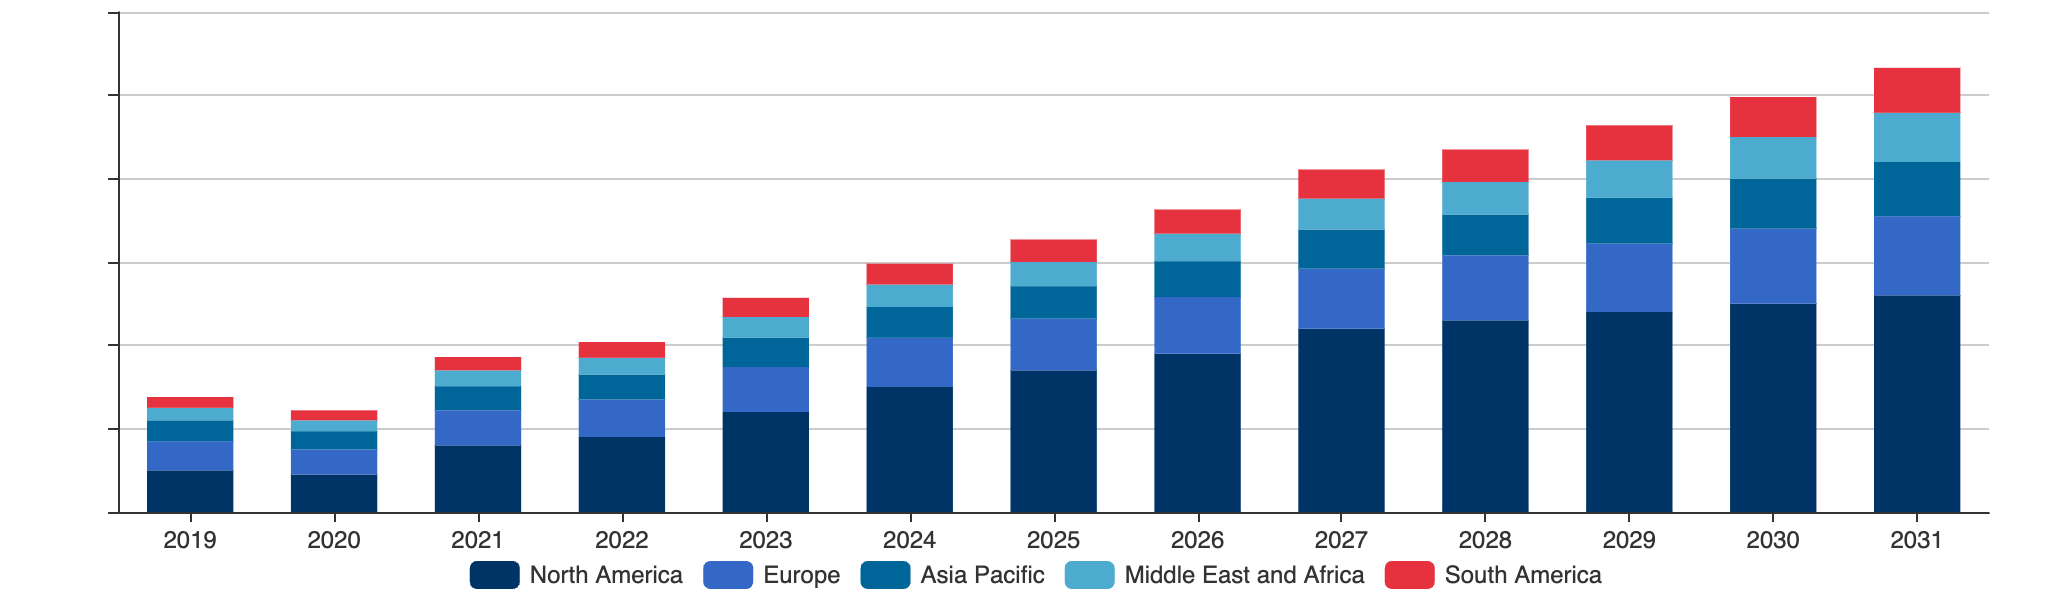
[image source](https://www.cognitivemarketresearch.com/running-apps-market-report)

*The chart above shows the market share of running apps across regions between 2019 to its projection in 2031.*

As of 2024, free running apps typically offer statistics to that help runners chart their progress, training regimes, audio coaching tips and realistic goal setting [source](https://www.runnersworld.com/uk/gear/tech/g32360411/best-apps-for-runners/). Despite their utility, these apps lack modern mechanisms to assess, analyze, and rectify users' running form.

### Running Injury and Overstriding

However, the increase in popularity of recreational running did not see a decrease in running injury incidence. In fact, in a study conducted in 2023, 1 in 2 runners sustained a prospective running injury during a 12-month surveillance period. [source](https://sportsmedicine-open.springeropen.com/articles/10.1186/s40798-023-00589-1)<br>

One of the most common running form errors amongst recreational runners is [overstriding](https://compedgept.com/blog/common-running-form-errors/). In the case of overstriding, a runner's foot is landing on the ground further too much out than it needs to. This typically happens when a runner is not leaning forward enough or taking longer strides to compensate for faster pace.

<img src='https://compedgept.com/wp-content/uploads/2021/07/27a.jpg' alt="Overstriding" width="20%">


### Nike Run Club: Status Quo and Opportunity

This presents an opportunity for Nike Run Club to implement new free features for recreational runners, securing Nike Run Club's position as a virtual running coach. 

A quick search on google playstore and apple appstore showed that Nike Run Club faces stiff competition in comparison to other sports brands.

|Running App|Playstore downloads|Playstore Rating|Appstore no. of ratings|Appstore ratings|
|---|---|---|---|---|
|adidas Running|50M+|4.5|3.8K|4.7|
|MapMyRun by Under Armour|10M+|4.8|4.3K|4.7|
|Asics Runkeeper|10M+|4.2|13K|4.7|
|Nike Run Club|10M+|3.9|7.6K|4.7|

While a search on google trends also shows Nike Run Club second in popularity of search to MapMyRun by Under Armour.

<img src="../images/running_app_google_trend.png" alt="Running App Google Trend" width="50%">

[Google trends, 2024](https://trends.google.com/trends/explore?date=today%205-y&q=%2Fg%2F11kzq1wq52,%2Fg%2F11kzp_4y3c,%2Fg%2F11kzq2n6j2,%2Fg%2F11lcqmfk_c&hl=en)

## Problem Statement:

Our challenge is to devise a solution that empowers individuals to **detect one of the most prevalent running form errors: overstriding**, attempting to strengthen Nike Run Club's position as a trusted virtual running coach and in turn, the app's ability to attract and retain users.

**Target Audience:** <br>
Nike Run Club's Product team and data science team.

---
There are a total of ___ notebooks for this project:  
 1. `01_Data_Collection_Video_Dl.ipynb`   
 2. `02_Data_Collection_Pose_Estimation.ipynb`   
 3. `03_Feature_Engineering_and_EDA.ipynb`
 4. `04_Data_Preprocessing_and_Modelling.ipynb`
 
**This Notebook:**
- With a compiled list of videos, we will be using PyTube to download and crop the videos.
- Horizontal flipping the videos will also be performed for data augmentation

# 1. Running Videos from YouTube

## 1.1 Importing Libraries

In [10]:
# Import libraries for video data collection
import cv2
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError  # Import AgeRestrictedError

# Import libraries for basic necessities
import numpy as np
import os
import time
import pandas as pd

## 1.2 Downloading videos using Pytube

### 1.2.1 Videos with good form - no overstriding

In [4]:
# Compiling a list of good running videos

no_overstride = ['https://www.youtube.com/shorts/we--w4_1WQ8', # 4 tips to start treadmill running, F
                   'https://www.youtube.com/shorts/0_QAg7rEv10', # 5K running paces, M
                   'https://www.youtube.com/shorts/vIohnJC6O1U', # treadmill for smaller spaces, M
                   'https://www.youtube.com/shorts/lindUTMDbyY', # abbypollock treadmill running, F (needs a lot of editting)
                   'https://www.youtube.com/watch?v=K6I24WgiiPw&t=148s', # Long video, proper running form, F
                   'https://www.youtube.com/watch?v=_kGESn8ArrU&t=433s', # Global Triathlon Network how to run properly, F
                   'https://www.youtube.com/watch?v=lWWZQpwKjhs', # Global Triathlon Network, Perfect Running Technique, F, 15:58-16:01
                   'https://www.youtube.com/watch?v=eacl52qzr4E', # Ben Parkes, How to improve and increase cadence, M, 3:27-3:33
                   'https://www.youtube.com/watch?v=woYOoEAPb_4', # Ben Parkes, How to make running easier, M, 0:44-0:46, 3:06-3:08, 7:10-7:12
                   'https://www.youtube.com/watch?v=kWFqpzu2Jw8', # Ben Parkes, How slow should my easy runs be?, M, 8:46-8:50
                   'https://www.youtube.com/watch?v=Rhd8xsoOlnU', # Natasha Oceana, How to easily run further, longer and faster, F, 0:31-0:33
                   'https://www.youtube.com/watch?v=3RlvKMxPMr0', # Higher Running, Essential Running Technique Tips for Proper Form, F, 4:29-4:31
                   'https://www.youtube.com/shorts/uKWoFbl3lOk' # Nico.felich, How to run longer, M, 
                   'https://www.youtube.com/shorts/RMJxIxLWfDY',
                   'https://www.youtube.com/shorts/KX0Mn8CmC0s',
                   'https://www.youtube.com/shorts/Ctc0vmpXUaM']

In [5]:
# Define a function that downloads YouTube Videos
def download_yt(url):
    try:
        # Object creation using YouTube
        yt = YouTube(url)
    except Exception as e:
        # Handle exception
        print("Connection Error:", e)
        return  # Exit the function if there's an exception

    try:
        # Get all streams
        all_streams = yt.streams.all()

        # Filter for streams with both video and audio
        video_streams = [s for s in all_streams if s.type == "video" and s.is_progressive]
        audio_streams = [s for s in all_streams if s.type == "audio"]

        # Choose the highest resolution video stream
        if video_streams:
            video_stream = video_streams[-1]
        else:
            video_stream = None

        # Choose the highest quality audio stream
        if audio_streams:
            audio_stream = audio_streams[-1]
        else:
            audio_stream = None

        # Download the video and audio streams with retry and increased timeout
        if video_stream and audio_stream:
            retries = 3  # Number of retries
            for attempt in range(retries):
                try:
                    video_stream.download(output_path=SAVE_PATH, timeout=120)  # Increased timeout
                    audio_stream.download(output_path=SAVE_PATH, timeout=120)  # Increased timeout
                    print(f'Video and audio from {url} downloaded successfully!')
                    break  # Exit loop if download is successful
                except Exception as e:
                    if 'IncompleteRead' in str(e):
                        print(f"IncompleteRead error ({attempt + 1}/{retries}): {e}")
                        if attempt == retries - 1:
                            print("Maximum retries reached. Download failed.")
                    else:
                        print("Other Error:", e)
                        break  # Exit loop if other errors occur
        else:
            print(f"No suitable video or audio streams found for {url}.")
    except AgeRestrictedError as e:
        print(f"Age-restricted video: {url}, skipped.")

In [9]:
# Download list of videos

# Define save path
SAVE_PATH = '../capstone_raw_data/datasets/good_running_raw'

for vid_url in no_overstride:
    download_yt(vid_url)

/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/shorts/we--w4_1WQ8 downloaded successfully!
Age-restricted video: https://www.youtube.com/shorts/0_QAg7rEv10, skipped.
Age-restricted video: https://www.youtube.com/shorts/vIohnJC6O1U, skipped.


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/shorts/lindUTMDbyY downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=K6I24WgiiPw&t=148s downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


IncompleteRead error (1/3): IncompleteRead(263704 bytes read, 9173480 more expected)
IncompleteRead error (2/3): IncompleteRead(263704 bytes read, 9173480 more expected)
IncompleteRead error (3/3): IncompleteRead(263704 bytes read, 9173480 more expected)
Maximum retries reached. Download failed.


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=lWWZQpwKjhs downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=eacl52qzr4E downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=woYOoEAPb_4 downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=kWFqpzu2Jw8 downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=Rhd8xsoOlnU downloaded successfully!


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/watch?v=3RlvKMxPMr0 downloaded successfully!
Age-restricted video: https://www.youtube.com/shorts/uKWoFbl3lOkhttps://www.youtube.com/shorts/RMJxIxLWfDY, skipped.


/var/folders/8t/r_dj4lrd7vg_k505mk7n7lv00000gn/T/ipykernel_5497/2663452516.py:15: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  all_streams = yt.streams.all()


Video and audio from https://www.youtube.com/shorts/KX0Mn8CmC0s downloaded successfully!
Age-restricted video: https://www.youtube.com/shorts/Ctc0vmpXUaM, skipped.


### 1.2.1 Videos with bad form - overstriding

In [ ]:
no_overstride = ['https://www.youtube.com/watch?v=n4KuXeu5MEY',
                 'https://www.youtube.com/watch?v=jgsNRJLK9rY',
                 'https://www.youtube.com/watch?v=dUfIH69qGvk',
                 'https://www.youtube.com/watch?v=AcbAzbJUoIk']

In [ ]:
# Download list of videos

# Define save path
SAVE_PATH = '../capstone_raw_data/datasets/bad_running_raw'

for vid_url in no_overstride:
    download_yt(vid_url)

## 1.3 Cropping Videos to specific timings

Since this project is focused solely on the most common running form error, over-striding, the side profile of running will be most efficient in capturing whether there is over-striding or not. 

For efficiency, I used iMovie to crop the videos to the specific parts of the video where the runner is captured in side profile. These videos are saved in '../datasets/good_running'

However, the function below can also be used to crop videos to specific timings.

In [ ]:
# # Function to crop videos based on start and stop seconds
# def crop_video(video_path, start_sec, stop_sec, output_path):
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print("Error opening video file")
#         return

#     fps = cap.get(cv2.CAP_PROP_FPS)
#     start_frame = int(start_sec * fps)
#     stop_frame = int(stop_sec * fps)

#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

#     cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         current_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
#         if current_frame > stop_frame:
#             break

#         out.write(frame)

#     cap.release()
#     out.release()
#     print(f"Video has been cropped and saved to {output_path}")

## 1.4 Data Collection from Voluntary Test Subjects

To supplement my dataset, I've also reached out to professional runners in Singapore to collect running videos from them. Below are some whom I've reached out to:

1. Ben Khoo - Singapore's Ironman Record Holder. (Video provided)
2. Jeevaneesh Soundararajah - Singapore's representative in the men's 5000 metres at the 2015 Southeast Asian Games and 1500 metres at the 2021 Southeast Asian Games. (Did not reply)
3. Soh Rui Yong - Singaporean national long-distance runner, and holder of six national records: 5,000m (track & road), 10,000m (track & road), half marathon and marathon. (Did not reply)

To represent the overstride dataset, I've conducted a data collection session with some test subjects. 4 Cues were given to 4 test subjects to naturally induce overstriding:

1. Lean backwards while running
2. Increase speed
3. Decrease cadence (number of steps per min)
4. Reach for the front of the treadmill

With further filtering of my dataset to ensure that the videos are labelled accordingly, I've ended up with the below:
No Overstride - 15 videos
Overstride - 16 videos

## 1.5 Video Editing

More video editing is performed using iMovie to standardise the position of runners, aspect ratio and frame rate of the video.

## 1.6 Video Specifics

Note that all videos used in this dataset are of the runner's side profile, this is where overstriding can be identified clearest as we can visibly tell if the runner's foot is extending far beyond the centre-of-mass during initial contact when each foot is landing. 

Next, we will apply some data augmentation methods to create a more robust dataset and also allow our trained model to be able to classify test videos regardless of the side in which the video is taken from.

# 2. Data Augmentation

In [11]:
# Defining the filepaths for videos

SOURCE_PATH_G = '../datasets/good_running' # Source path for no_overstride videos
SOURCE_PATH_B = '../datasets/bad_running' # Source path for overstride videos

# Get a list of all video files in the source folder
video_files_g = [f for f in os.listdir(SOURCE_PATH_G) if f.endswith('.mp4')]
video_files_b = [f for f in os.listdir(SOURCE_PATH_B) if f.endswith('.mp4')]

# Define the path for exported data (numpy arrays)
EXPORT_PATH_G = '../datasets/no_overstride_augment'
EXPORT_PATH_B = '../datasets/overstride_augment'

## 2.1 Horizontal Flip

In [12]:
def flip_video_horizontally(input_video_path, output_video_path):
    '''
    Flip the video file horizontally

    Args:
    input_video_path: path of the video file
    output_video_path: path of the destination video file to write to
    '''
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' codec for MP4 format
    out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS),
                          (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
    
    # Loop through each frame in the video
    while True:
        ret, frame = cap.read() # read the frame from the video
        if not ret: # if cannot read frame, break loop
            break

        # Flip the frame horizontally
        flipped_frame = cv2.flip(frame, 1)
        # write the flipped frame to the output video
        out.write(flipped_frame)

    # Release video capture object
    cap.release()
    # Release video write object
    out.release()
    # Print message indicating video flipping and saving
    print(f"Video flipped and saved to: {output_video_path}")


In [13]:
for vidmp4 in video_files_g:
    # Ensure the export directory exists, create it if it doesn't
    os.makedirs(EXPORT_PATH_G, exist_ok=True)
    
    # Construct the full path to the video file
    vid_file = os.path.join(SOURCE_PATH_G, vidmp4)
    
    # Remove the '.mp4' extension from the video file name
    video_name = os.path.splitext(vidmp4)[0]
    
    # Construct the full output path for the flipped video
    output_video_path = os.path.join(EXPORT_PATH_G, f"{video_name}_flipped.mp4")
    
    # Flip the video and save it to the correct directory
    flip_video_horizontally(vid_file, output_video_path)

Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_3_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_2_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_6_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_7_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_5_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/F_Running_4_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/M_Running_8_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/M_Running_3_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/M_Running_2_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/M_Running_1_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_augment/M_Running_5_flipped.mp4
Video flipped and saved to: ../datasets/no_overstride_

In [14]:
for vidmp4 in video_files_b:
    # Ensure the export directory exists, create it if it doesn't
    os.makedirs(EXPORT_PATH_B, exist_ok=True)
    
    # Construct the full path to the video file
    vid_file = os.path.join(SOURCE_PATH_B, vidmp4)
    
    # Remove the '.mp4' extension from the video file name
    video_name = os.path.splitext(vidmp4)[0]
    
    # Construct the full output path for the flipped video
    output_video_path = os.path.join(EXPORT_PATH_B, f"{video_name}_flipped.mp4")
    
    # Flip the video and save it to the correct directory
    flip_video_horizontally(vid_file, output_video_path)

Video flipped and saved to: ../datasets/overstride_augment/Overstride_16_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_17_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_15_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_14_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_10_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_11_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_13_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_12_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_7_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_6_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstride_4_flipped.mp4
Video flipped and saved to: ../datasets/overstride_augment/Overstrid

All videos have been saved to their respective folders

## 2.2 Other augmentation methods

Other augmentation methods include (not extensive) [(source)](https://github.com/okankop/vidaug):
1. Adjusting brightness
2. Adjusting contrast
3. Shear 
4. Gaussian Blur

I will not be performing these methods as they will either 
1. Affect the performance of the pose estimation model in the next step (Shear, Gaussian Blur) causing issues in pose estimation data extraction on a dataset that is already not robust enough.
2. The results will be exactly duplicated as the model detects the pose in the same position (Brightness and Contrast adjustments). With the limited dataset, we do not want the data to be overfit to certain styles of running only. 

When we are able to achieve a more robust dataset, these augmentation methods can be considered to train the model such that it takes in videos that are not perfectly recorded.

# 3. Next Step

Next, I will be using a pose detection model to collect pose_landmark data. This array of data created with the model will convert full body joint positions into numerical (x, y, z, v) values. 